## FP SIG 9.29.22
### Review

In [29]:
:opt no-lint
import Data.List
import Data.Char

In [30]:
17 * 1729
17 + 1729
17 - 1729

29393

1746

-1712

In [31]:
add x y = x + y
addTwice x y = add x y + add x y

addTwice 10 90

200

In [32]:
[1,2,3,4] == 1:2:3:4:[]
"Hello MCA!" == 'H':'e':'l':'l':'o':' ':'M':'C':'A':'!':[]

True

True

In [33]:
("dog", 89, 788.098) == (,,) "dog" 89 788.098
("first", "second") == (,) "first" "second"

True

True

In [34]:
pie :: Integer
pie = 3

ee :: Rational
ee = 2.78

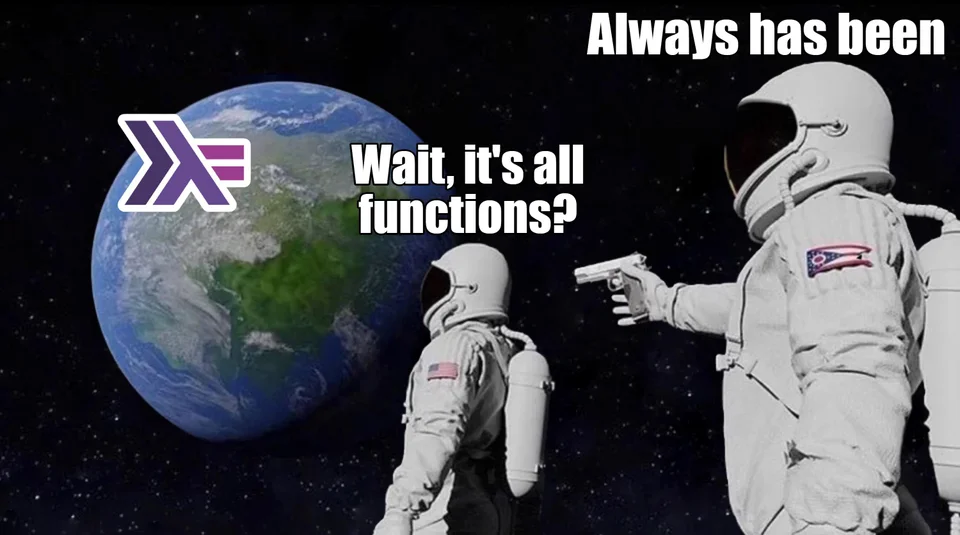

In [35]:
addToList x x' xs = x:x':xs

addToList 'h' 'e' "llo world"

"hello world"

addReversed :: [a] -> [a] -> [a]
addReversed xs ys = reverse xs ++ reverse ys

addReversed "foo" "bar"

In [36]:
number = 7 :: Integer

stringUpper :: String -> String
stringUpper xs = map toUpper xs

nestedList = [[[[],[1,2,3]]]] :: [[[[Int]]]]

In [37]:
-- combine :: [a] -> ([a] -> [a])
combine :: [a] -> [a] -> [a]
combine xs ys = xs ++ ys

In [38]:
(combine "foo") "bar" == combine "foo" "bar"
:type combine "foo"

True

combine "foo" :: [Char] -> [Char]

### Lambdas

In [39]:
map (`mod` 3 == 0) [1..100]

: 

In [40]:
map (\x -> x `mod` 3 == 0) [1..100]

[False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False]

In [41]:
removeUpper :: String -> String
removeUpper xs = filter isLower xs

removeUpper' :: String -> String
removeUpper' = (\xs -> filter isLower xs)

removeUpper "UPPERlowerUPPER"
removeUpper' "abababABabAB"

"lower"

"abababab"

### Pattern Matching

In [42]:
listFunc :: [a] -> [a]
listFunc [] = []
listFunc (x:xs) = xs ++ [x]

In [43]:
foo :: String -> String
foo "bar" = "baz"
foo st = st

foo "bar"
foo "aldsfkj"

"baz"

"aldsfkj"

In [44]:
tupleFunc :: (a,b,String) -> [String]
tupleFunc (_,_,x) = replicate 10 x

tupleFunc ("foo", "bar", "baz")

["baz","baz","baz","baz","baz","baz","baz","baz","baz","baz"]

In [45]:
intFunc :: Int -> Int
intFunc 0 = -100
intFunc 1 = 0
intFunc x = x*4

In [46]:
frobble :: (String, Int) -> String
frobble ("", 0) = "so peaceful"
frobble _ = "blech"

### Where and Let Bindings

In [47]:
-- check if the letters in these two strings are equal
x = "foobarbaz098098::';';';hi098'"
y = "ihoofrabzab!!!!!!!!"

areEqual :: String -> String -> Bool
areEqual xs ys = sort (filter isAlpha xs) == sort (filter isAlpha ys)

areEqual' :: String -> String -> Bool
areEqual' xs ys = norm xs == norm ys
    where norm st = sort (filter isAlpha st)

areEqual x y

True

In [48]:
-- convert GATCATAGTCTA to RNA
toRNA :: String -> String
toRNA xs = [write x | x <- map toUpper xs]
    where
        write 'G' = 'C'
        write 'C' = 'G'
        write 'T' = 'A'
        write 'A' = 'U'
        write x = x
        
toRNA "GATCATAGTCTA"

"CUAGUAUCAGAU"

In [49]:
areEqual'' :: String -> String -> Bool
areEqual'' xs ys = let norm st = sort (filter isAlpha st) 
                   in norm xs == norm ys

areEqual'' "foobar" "foo098908b0-98ar"

True

In [50]:
foo :: (String, String) -> Int
foo input = let (x1, x2) = input in length x1

### Guards and If Then Else

In [51]:
temperature :: Int -> String
temperature x = if x > 60 then "yay I love warm weather" else "booooooooooo"

In [52]:
temperature' :: Int -> String
temperature' x 
    | x > 60 = "Woo warm weather!"
    | x < 32 = "Snow??"
    | otherwise = "boring temperature smh"

### Recursion

In [53]:
-- from Learn You a Haskell
quicksort :: (Ord a) => [a] -> [a]
quicksort [] = []
quicksort (x:xs) =
  let smallerSorted = quicksort [a | a <- xs, a <= x]
      biggerSorted = quicksort [a | a <- xs, a > x]
  in  smallerSorted ++ [x] ++ biggerSorted
  
quicksort [89,48,123,90,23,431,213,-098,1239,4]

[-98,4,23,48,89,90,123,213,431,1239]

In [54]:
factorial :: Integer -> Integer
factorial 0 = 1
factorial x = x * factorial (x-1)

factorial 5

120

### Laziness

In [55]:
val = map (\var -> 10 + (987 * var) `mod` 37) [1..10]
head val

35

In [56]:
-- foo (bar (baz x))

### Infinite Lists

In [57]:
take 10 [5,10..]

[5,10,15,20,25,30,35,40,45,50]

In [58]:
ones = 1 : ones
take 10 ones

[1,1,1,1,1,1,1,1,1,1]

In [59]:
nums = 1 : map (+ 1) nums

take 10 nums

[1,2,3,4,5,6,7,8,9,10]

In [60]:
fibs = 0 : 1 : helper 0 1
    where helper x y = x + y : helper y (x + y)
    
take 20 fibs

[0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597,2584,4181]

In [61]:
fibs' = 0 : 1 : zipWith (+) fibs' (tail fibs')
take 20 fibs'

[0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597,2584,4181]

In [62]:
primes :: [Integer]
primes = sieve [2..]
  where
    sieve (p:xs) = p : sieve [x|x <- xs, x `mod` p > 0]
    
take 100 primes

[2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269,271,277,281,283,293,307,311,313,317,331,337,347,349,353,359,367,373,379,383,389,397,401,409,419,421,431,433,439,443,449,457,461,463,467,479,487,491,499,503,509,521,523,541]

[Infinite Lists of Primes](https://wiki.haskell.org/Prime_numbers)

In [63]:
take 100 (cycle "racecar")

"racecarracecarracecarracecarracecarracecarracecarracecarracecarracecarracecarracecarracecarracecarra"

In [64]:
letters :: Char -> [[Char]]
letters c = map (\x -> replicate x c) [1..]

take 10 (letters 'a')

["a","aa","aaa","aaaa","aaaaa","aaaaaa","aaaaaaa","aaaaaaaa","aaaaaaaaa","aaaaaaaaaa"]